In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv(r"C:\Users\hegde\Downloads\loan_train.csv")

In [2]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#filling missing value
df['Gender'].fillna('Male',inplace=True)

In [5]:
df['Dependents'].nunique

<bound method IndexOpsMixin.nunique of 0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object>

In [6]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [7]:
df['Married'].nunique

<bound method IndexOpsMixin.nunique of 0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object>

In [8]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [9]:
df['Self_Employed'].nunique

<bound method IndexOpsMixin.nunique of 0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object>

In [10]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [11]:
df['LoanAmount'].nunique

<bound method IndexOpsMixin.nunique of 0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64>

In [12]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [13]:
df['Loan_Amount_Term'].nunique

<bound method IndexOpsMixin.nunique of 0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64>

In [14]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [15]:
df['Credit_History'].nunique

<bound method IndexOpsMixin.nunique of 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64>

In [16]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [19]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

DF=df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

train,test=train_test_split(DF,test_size=0.3,random_state=0)

x_train=train.drop('Loan_Status',axis=1)
y_train=train['Loan_Status']

x_test=test.drop('Loan_Status',axis=1)
y_test=test['Loan_Status']

In [21]:
#create dummies
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

In [22]:
x_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
454,7085,0.0,84.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0
52,4230,0.0,112.0,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0
536,6133,3906.0,324.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
469,4333,2451.0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
55,2708,1167.0,97.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2965,5701.0,155.0,60.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
515,3466,3428.0,150.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
582,3166,0.0,36.0,360.0,1.0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0
225,3250,0.0,170.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [23]:
x_train.shape

(429, 20)

In [24]:
y_train=train['Loan_Status']
# print(y_train.head())
y_test=test['Loan_Status']
# print(y_test.head())

# y_train=pd.get_dummies(y_train)
# y_test=pd.get_dummies(y_test)

Y    422
N    192
Name: Loan_Status, dtype: int64


<Axes: >

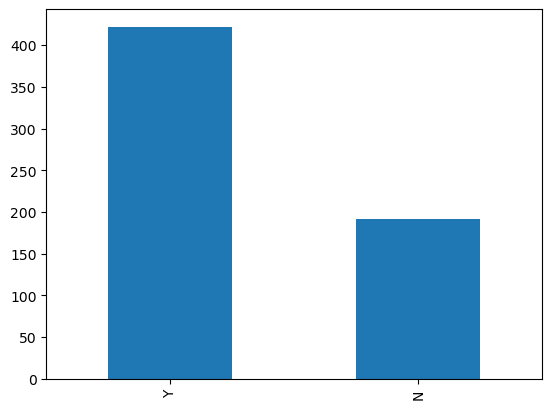

In [25]:
print(df['Loan_Status'].value_counts())
df['Loan_Status'].value_counts().plot(kind='bar')

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [27]:
# x_train,X_val,y_train,y_val=train_test_split(x_train,y_train,test_size=t_size,random_state=r_state)
#decission tree model
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_model_pred_test=dt_model.predict(x_test)
# print(dt_model_pred_te
dt_accuracy=accuracy_score(dt_model_pred_test,y_test)
print("DT accuracy",dt_accuracy)

DT accuracy 0.7783783783783784


In [28]:
#knn model
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
knn_model_pred_test=knn_model.predict(x_test)
# print(knn_model_pred_test
knn_accuracy=accuracy_score(knn_model_pred_test,y_test)
print("KNN accuracy",knn_accuracy)

KNN accuracy 0.6270270270270271


In [29]:
#knn model
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
lr_model_pred_test=lr_model.predict(x_test)
lr_accuracy=accuracy_score(lr_model_pred_test,y_test)
print("lr accuracy",lr_accuracy)

lr accuracy 0.8054054054054054


# Bagging Classifier

In [30]:
from sklearn.ensemble import BaggingClassifier

In [31]:
bag_bg=BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),n_estimators=10,bootstrap=True)

In [32]:
bag_bg.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'))

In [33]:
bag_bg.predict(x_test)

array(['N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [34]:
bag_bg.base_estimator_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


DecisionTreeClassifier(criterion='entropy')

In [35]:
bag_bg.classes_

array(['N', 'Y'], dtype=object)

In [36]:
bag_bg.estimator_

DecisionTreeClassifier(criterion='entropy')

In [37]:
bag_bg.estimator_params

()

In [38]:
bag_bg.score(x_test,y_test)

0.7891891891891892

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
bag_knn=BaggingClassifier(KNeighborsClassifier(),n_estimators=10)

In [41]:
bag_knn.fit(x_train,y_train)

BaggingClassifier(estimator=KNeighborsClassifier())

In [42]:
bag_knn.predict(x_test)

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N

In [43]:
bag_knn.score(x_test,y_test)

0.6162162162162163

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf=RandomForestClassifier()

In [46]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
rf.score(x_test,y_test)

0.7837837837837838

In [48]:
bag_bg.score(x_test,y_test)

0.7891891891891892

In [49]:
bag_knn.score(x_test,y_test)

0.6162162162162163

# Bagging Rgressor

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import sklearn.cross_decomposition as cv
import sklearn

dataset=fetch_california_housing()
X=dataset['data']
y=dataset['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [51]:
from sklearn.ensemble import BaggingRegressor
model=BaggingRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([2.3544  , 0.9993  , 1.174   , ..., 2.826501, 3.036401, 1.3743  ])

In [52]:
MSE=((y_test-y_pred)**2).sum()
print(MSE)
TSS=((y_test-y_test.mean())**2).sum()
print(TSS)
R2=1-(MSE/TSS)
print(R2)

1525.134634517352
6863.722475595281
0.7777977416860697


In [53]:
model_lr=BaggingRegressor(Ridge(),n_estimators=20)
model_lr.fit(X_train,y_train)
y_pred_lr=model.predict(X_test)
y_pred_lr

array([2.3544  , 0.9993  , 1.174   , ..., 2.826501, 3.036401, 1.3743  ])

In [54]:
MSE_lr=((y_test-y_pred_lr)**2).sum()
print(MSE_lr)
TSS_lr=((y_test-y_test.mean())**2).sum()
print(TSS_lr)
R2_lr=1-(MSE_lr/TSS_lr)
print(R2_lr)

1525.134634517352
6863.722475595281
0.7777977416860697


In [55]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=20)

In [56]:
rf1.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
rf1.estimator_

# Blending Techniques

In [57]:
from numpy import hstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

dataset=sklearn.datasets.load_diabetes()

#get the datset
def get_dataset():
    X,y=dataset['data'],dataset['target']
    return X,y

#get a list of base models
def get_models():
    models=list()
    models.append(('lr',LogisticRegression()))
    models.append(('knn',KNeighborsClassifier()))
    models.append(('cart',DecisionTreeClassifier()))
    models.append(('svm',SVC()))
    models.append(('bayes',GaussianNB()))
    return models

#fit the blending ensemble
def fit_ensemble(models,X_train,X_val,y_train,y_val):
    #fit all models on the trainting set and predict on hold out set
    meta_X=list()
    for name,model in models:
        model.fit(X_train,y_train)
        #fit in traing set
        yhat=model.predict(X_val)
        #reshape pred into a matrix with one column
        yhat=yhat.reshape(len(yhat),1)
        #store pred as input for blending
        meta_X.append(yhat)
        #create 2d array from pred each set is input feature
    meta_X=hstack(meta_X)
        #define blending model
    blender=LogisticRegression()
        #fit on pred from models
    blender.fit(meta_X,y_val)
    return blender


#make a pred with the blending ensemble
def predict_ensemble(models,blender,X_test):
    meta_X=list()
    for name,model in models:
        yhat=model.predict(X_test)
        yhat=yhat.reshape(len(yhat),1)
        meta_X.append(yhat)
    meta_X=hstack(meta_X)
    return blender.predict(meta_X)
    


In [58]:
X,y=get_dataset()

In [59]:
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,test_size=0.5,random_state=1)

In [60]:
X_train,X_val,y_train,y_val=train_test_split(X_train_full,y_train_full,test_size=0.33,random_state=1)

In [61]:
print('Train: %s,val: %s,Test: %s'%(X_train.shape,X_val.shape,X_test.shape))

Train: (148, 10),val: (73, 10),Test: (221, 10)


In [62]:
models=get_models()
models

[('lr', LogisticRegression()),
 ('knn', KNeighborsClassifier()),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC()),
 ('bayes', GaussianNB())]

In [63]:
blender=fit_ensemble(models,X_train,X_val,y_train,y_val)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
blender

LogisticRegression()

In [65]:
yhat=predict_ensemble(models,blender,X_test)
score=accuracy_score(y_test,yhat)
print('Blending accuracy: %3f' %(score*100))

Blending accuracy: 0.452489
